<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Predicting Shots Made Per Game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties — ridge, lasso, and elastic net — to try and predict how many shots Kobe Bryant made per game during his career.

The Kobe Shots data set contains hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model, considering the limited number of observations (games) we have available. Plus, many of the predictors have significant multicollinearity. 


**Warning:** Some of these calculations are computationally expensive and may take a while to execute. It may be worthwhile to only use a portion of the data to perform these calculations, especially if you've experienced kernel issues in the past.

---

### 1) Load packages and data.

In [71]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, KFold

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [72]:
kobe = pd.read_csv('./datasets/kobe_superwide_games.csv')

In [73]:
kobe.isnull().sum()

SHOTS_MADE                                        0
AWAY_GAME                                         0
SEASON_OPPONENT:atl:1996-97                       0
SEASON_OPPONENT:atl:1997-98                       0
SEASON_OPPONENT:atl:1999-00                       0
SEASON_OPPONENT:atl:2000-01                       0
SEASON_OPPONENT:atl:2001-02                       0
SEASON_OPPONENT:atl:2002-03                       0
SEASON_OPPONENT:atl:2003-04                       0
SEASON_OPPONENT:atl:2004-05                       0
SEASON_OPPONENT:atl:2005-06                       0
SEASON_OPPONENT:atl:2006-07                       0
SEASON_OPPONENT:atl:2007-08                       0
SEASON_OPPONENT:atl:2008-09                       0
SEASON_OPPONENT:atl:2009-10                       0
SEASON_OPPONENT:atl:2010-11                       0
SEASON_OPPONENT:atl:2011-12                       0
SEASON_OPPONENT:atl:2012-13                       0
SEASON_OPPONENT:atl:2013-14                       0
SEASON_OPPON

---

### 2) Examine the data.

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why might regularization be particularly useful for modeling this data?

In [74]:
#There are 645 columns 
#Each row represents a game played, columns represent stats of a game
# Regularization is good for lowerinig variance and giving more usability to a model through bias. If we want some 
# predicatbility to this model, we may need instinatate regularization
kobe.head(7)

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
5,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,6
6,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7


---

### 3) Create predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [75]:
notSM = [x for x in kobe if x!= 'SHOTS_MADE']
X = kobe[notSM]
y = kobe['SHOTS_MADE']

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
kX = ss.transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [76]:
lr = LinearRegression()
lr.fit(kX, y)
kobepr = lr.predict(kX)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


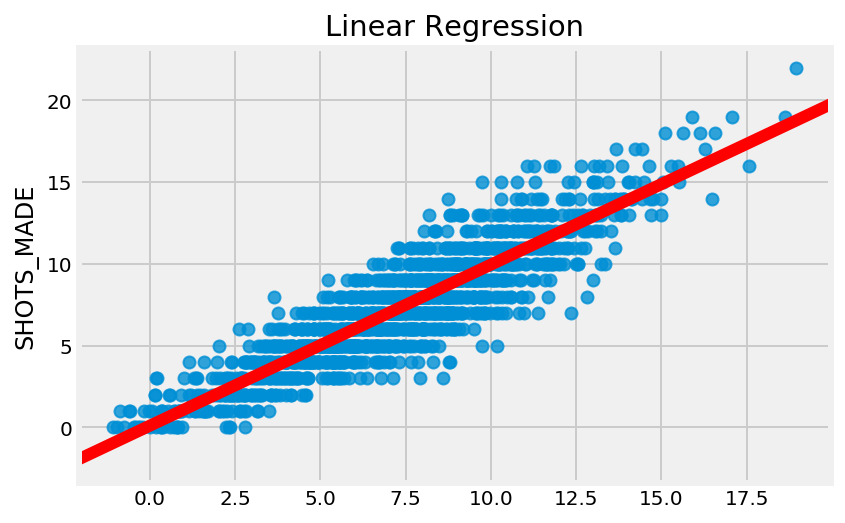

In [77]:
plt.title('Linear Regression')
sns.regplot(kobepr, y, line_kws={'color':'red'})

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [78]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score(lr, kX, y, cv=kf).mean()

-3.588616646962929e+27

In [79]:
## The cross val score tell us that our model does not perform accurately

---

### 5) Find an optimal value for the ridge regression alpha using `RidgeCV`.

Go to the documentation and [read how RidgeCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

> *Hint: Once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that ridge performs best when searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit.


In [107]:
rcv = RidgeCV(alphas = np.logspace(0,5,200), cv = 10, scoring ='r2')
rcv.fit(kX, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='r2', store_cv_values=False)

In [108]:
rcv.score(kX, y)

0.7798565133622948

In [106]:
RO = rcv.alpha_
RO

775.2597488629465

---

### 6) Cross-validate the ridge regression $R^2$ with the optimal alpha.

Is it better than the linear regression? If so, why might this be?

In [83]:
# A: Yes, there are multiple reasons but the major one could be that there are many variables acting on the regression and therefore causing
#a lot of "noise" to our regression. The other thing is we are working with 600+ variables. 

---

### 7) Find an optimal value for lasso regression alpha using `LassoCV`.

Go to the documentation and [read how LassoCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). It is very similar to `RidgeCV`.

> *Hint: Again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that lasso, unlike ridge, performs best when searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide what alphas to use itself by setting the keyword argument `n_alphas=` to however many alphas you want it to search over. We recommend letting scikit-learn choose the range of alphas.

_**Tip:** If you find your CV taking a long time and you're not sure if it's working, set `verbose =1`._

In [110]:
# A: 
lcv = LassoCV(n_alphas = 200, cv = 10)
lcv.fit(kX, y)
lcvp = lcv.predict(kX)

In [111]:
lcv.score(kX, y)

0.7099635073522508

In [86]:
LO = lcv.alpha_
LO

0.06857472683790841

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


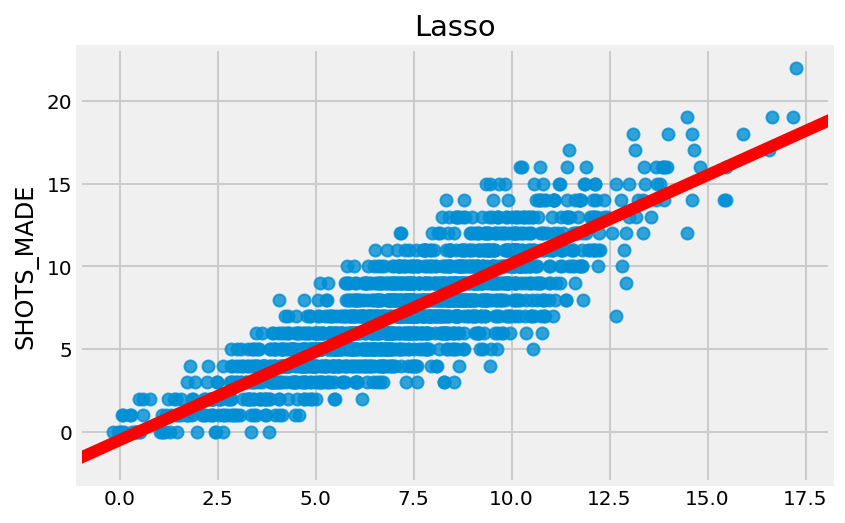

In [87]:
plt.title('Lasso')
sns.regplot(lcvp, y, line_kws={'color':'red'})

---

### 8) Cross-validate the lasso $R^2$ with the optimal alpha.

Is it better than the linear regression? Is it better than ridge? What do the differences in results imply about the issues with the data set?

In [89]:
#Ridge appears to be the higher score. It is likely due to the fact there may be colinearity among several variables. Since we have so many, the chances of it increases.
#l1 (Lasso) = 0.7099635073522508
#L2 (Ridge) = 0.7798565133622948

---

### 9) Look at the coefficients for variables in the lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original data set are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** If you only fit the lasso within `cross_val_score`, you'll have to refit it outside of that function to pull out the coefficients.

In [90]:
#Alpha Coefficent:
# L1 Lasso: 0.06857472683790841
# L2 Ridge: 775.2597488629465


In [91]:
np.sort(abs(rcv.coef_))[:: -1]

array([2.71599147e-01, 2.54132211e-01, 2.50996313e-01, 2.28627222e-01,
       2.26872594e-01, 2.24674471e-01, 2.19035643e-01, 2.13666033e-01,
       2.09142376e-01, 1.74258364e-01, 1.68962367e-01, 1.64220391e-01,
       1.55484471e-01, 1.41094089e-01, 1.33524195e-01, 1.30759206e-01,
       1.29465958e-01, 1.20987186e-01, 1.18414348e-01, 1.14115114e-01,
       1.13060298e-01, 1.10586816e-01, 1.09768772e-01, 1.05760884e-01,
       1.05265981e-01, 1.04987374e-01, 1.01872669e-01, 1.01662020e-01,
       1.01268615e-01, 9.89267358e-02, 9.78649344e-02, 9.66402681e-02,
       9.55307530e-02, 9.06798233e-02, 8.77852572e-02, 8.77222669e-02,
       8.72728662e-02, 8.70512115e-02, 8.69836505e-02, 7.92718103e-02,
       7.82047322e-02, 7.80809537e-02, 7.69289531e-02, 7.54792975e-02,
       7.40880387e-02, 7.40553276e-02, 7.37048280e-02, 7.36427584e-02,
       7.31213902e-02, 7.25356024e-02, 7.15663929e-02, 7.03707495e-02,
       6.90333936e-02, 6.89290385e-02, 6.85814238e-02, 6.79062621e-02,
      

In [92]:
np.sort(abs(lcv.coef_))[::-1]

array([1.23112046e+00, 8.69577199e-01, 4.51875972e-01, 2.74703985e-01,
       2.71477489e-01, 1.41237124e-01, 1.32855473e-01, 1.29086174e-01,
       1.26247994e-01, 1.18177613e-01, 1.16283268e-01, 1.14575966e-01,
       1.10669232e-01, 1.04095930e-01, 9.86847496e-02, 9.63419533e-02,
       9.43851046e-02, 8.85156746e-02, 7.81749592e-02, 7.44785645e-02,
       7.07531065e-02, 7.02872913e-02, 6.80152565e-02, 6.74679260e-02,
       6.47174139e-02, 6.20363439e-02, 5.85418445e-02, 5.49207943e-02,
       5.31257790e-02, 5.28445130e-02, 5.20102600e-02, 5.15148935e-02,
       4.94310968e-02, 4.84822625e-02, 4.68467975e-02, 4.40237907e-02,
       4.17461858e-02, 4.16442660e-02, 4.16082113e-02, 3.99053479e-02,
       3.95554805e-02, 3.74917496e-02, 3.53045450e-02, 3.52465653e-02,
       3.51397527e-02, 3.47783180e-02, 3.40551554e-02, 3.17486709e-02,
       3.12888906e-02, 3.03678355e-02, 3.02820892e-02, 2.93166905e-02,
       2.93044270e-02, 2.92894637e-02, 2.85692973e-02, 2.85512096e-02,
      

In [93]:
not0lasso = 0
for notzero in lcv.coef_:
    if notzero == 0:
        not0lasso += 1
not0lasso/ len(lcv.coef_)

# 79% of the coefficents have been zeroed out

0.7903726708074534

In [94]:
np.argmax(lcv.coef_)

579

In [95]:
lcv.coef_[579]

1.2311204562269409

In [96]:
kobe.columns[579]
#Hook Shot is most correlated 

'COMBINED_SHOT_TYPE:hook_shot'

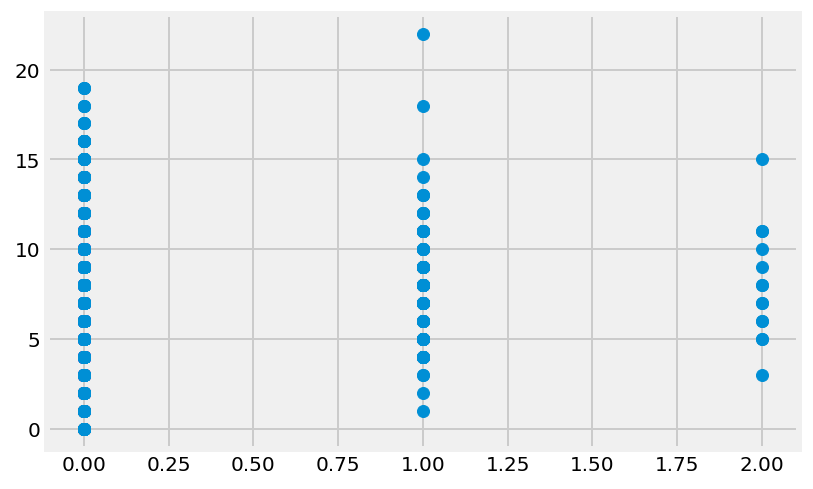

In [97]:
plt.scatter(kobe['COMBINED_SHOT_TYPE:hook_shot'], kobe['SHOTS_MADE'])

---

### 10) Find an optimal value for elastic net regression alpha using `ElasticNetCV`.

Go to the documentation and [read how ElasticNetCV works](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note that here you'll be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: Strength of regularization.
- `l1_ratio`: Amount of ridge vs. lasso (0 = all ridge, 1 = all lasso).
    
Do not include 0 in the search for `l1_ratio` — it won't allow it and will break.

You can use `n_alphas` for the alpha parameters instead of setting your own values, which we highly recommend.

Also, be careful setting too many l1_ratios over cross-validation folds in your search. It can take a long time if you choose too many combinations and, for the most part, there are diminishing returns in this data.

In [98]:
import numpy as np

# Ridge: 1742.6333860096508
# Lasso: 0.07610097429914478

enet_model = ElasticNetCV(n_alphas=200, l1_ratio=[.01, .25,.50,.75, 1],  cv=10)
enet_model = enet_model.fit(kX, y)
enet_model.alpha_


0.06857472683790841

In [99]:
enet_model.l1_ratio_

1.0

In [112]:
enet_model.score(kX, y)

0.7099635073522508

---

### 11) Cross-validate the elastic net $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the ridge and lasso regularized regressions?

In [ ]:
#It's a lower score than ridge and the Elastic net model believes optimium
# would be to adopt a strict lasso regularization to
# reduce the high variance which may be noise in our data

---

### 12. [Bonus] Compare the residuals for ridge and lasso visually.


In [102]:
# A: Maybe a jointplot?